In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_salario = pd.read_csv('./datasets/dataset_salario.csv')

In [3]:
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
df_salario_eda = df_salario.copy()

In [5]:
df_salario_bucketing = df_salario.copy()

In [6]:
df_salario_eda.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [7]:
df_salario_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [8]:

df_salario_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


### Analise Univariada

<Axes: xlabel='tempo_na_empresa'>

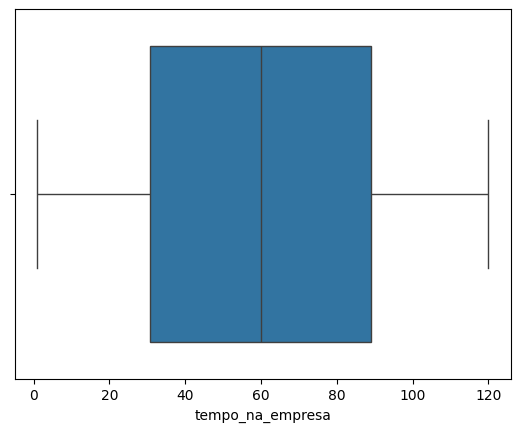

In [9]:
sns.boxplot(data=df_salario_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

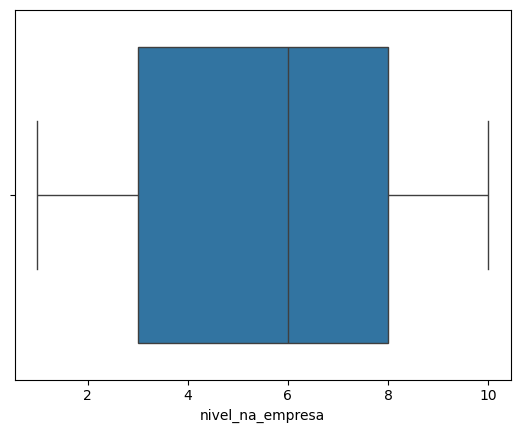

In [10]:
sns.boxplot(data=df_salario_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

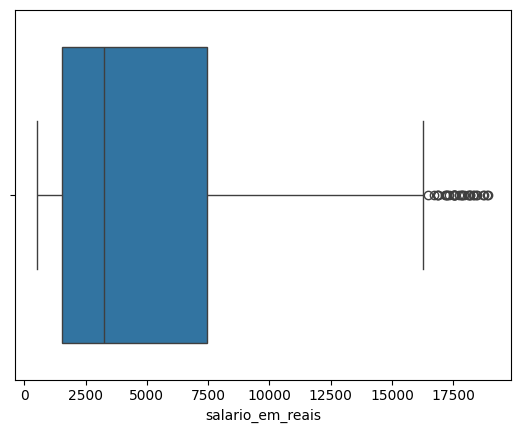

In [11]:
sns.boxplot(data=df_salario_eda, x='salario_em_reais')

### Analisi Bivariada

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

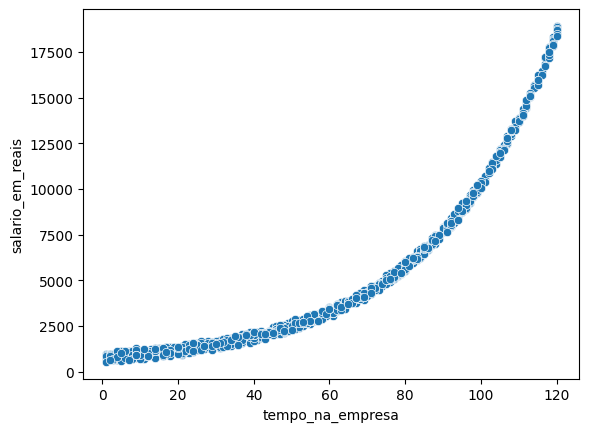

In [12]:
sns.scatterplot(data=df_salario_eda, x='tempo_na_empresa',y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

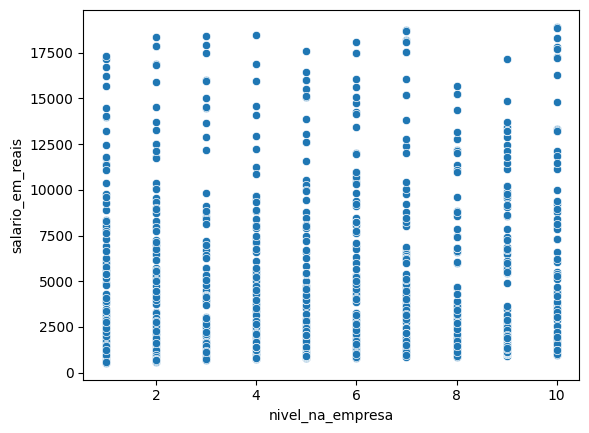

In [13]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

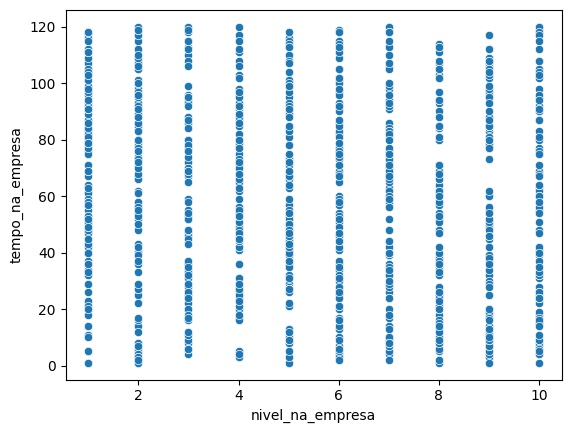

In [14]:
sns.scatterplot(data=df_salario_eda, x='nivel_na_empresa', y='tempo_na_empresa')

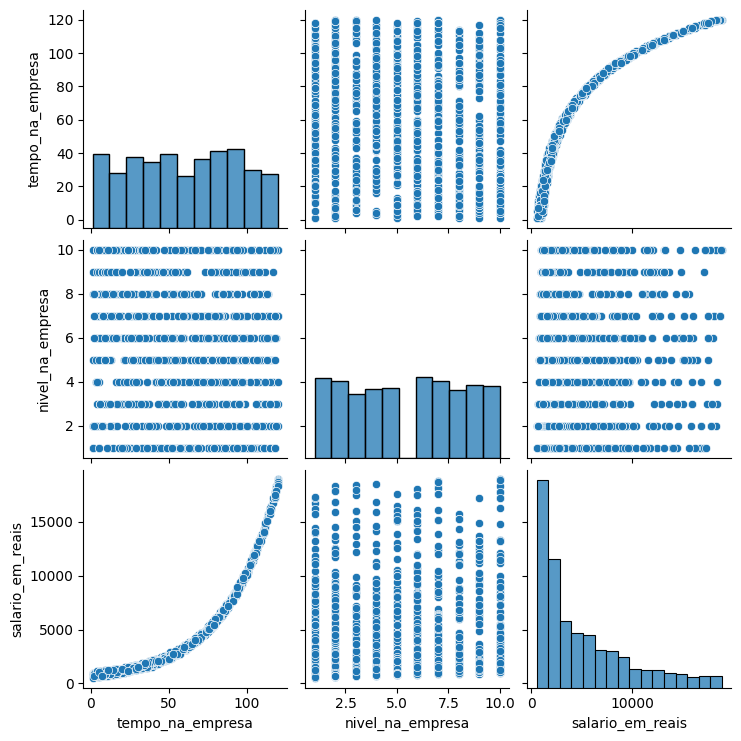

In [15]:
sns.pairplot(df_salario_eda)

### Analsise Multivariada

<Axes: >

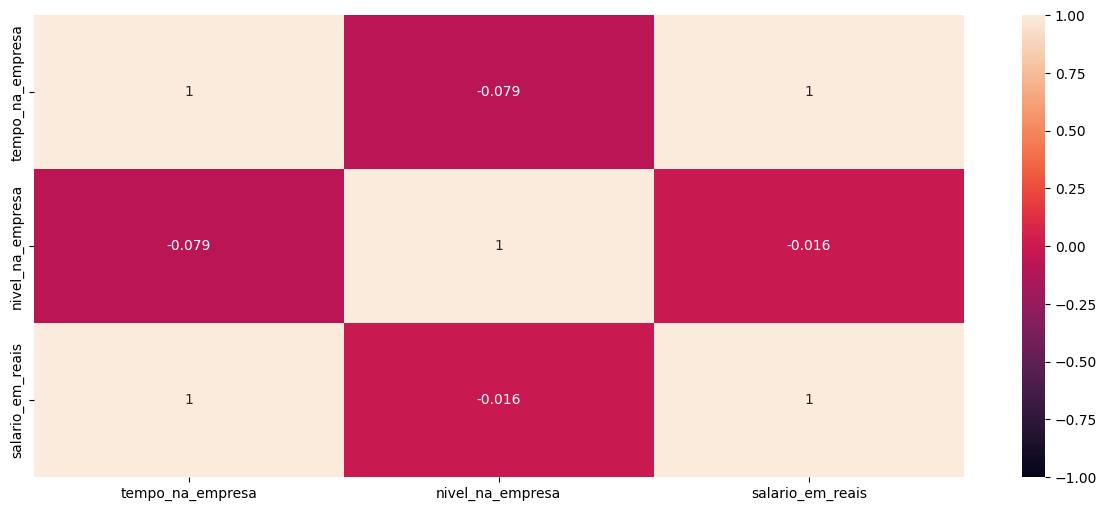

In [16]:
# Mapa de calor
plt.figure(figsize=(15,6))
sns.heatmap(df_salario_eda.corr('spearman'), vmin=-1, vmax=1, annot=True)

<Axes: >

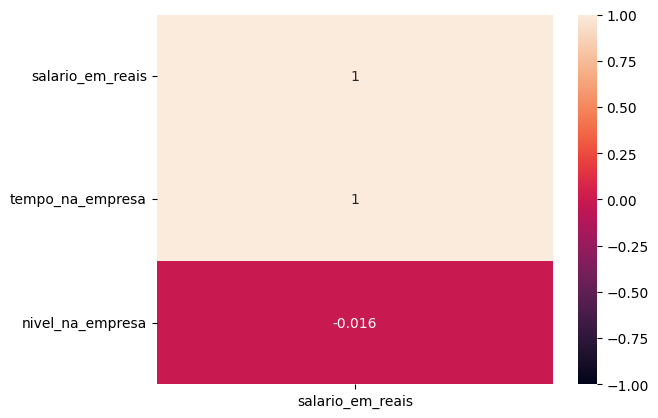

In [17]:
# Formato de Ranking
sns.heatmap(df_salario_eda.corr('spearman')[['salario_em_reais']].sort_values(by= 'salario_em_reais',ascending=False), vmin=-1, vmax=1, annot=True)

In [18]:
# Backeting tempo na empresa
bins_tempo_na_empresa = [0, 10, 20, 30, 40, 50, 60,70, 80, 90,100, 110, 120, 130 ]
labels_tempo_na_empresa = ['0-9', '10-19', '20-29','30-39', '40-49', '50-59','60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129']
df_salario_bucketing['escala_tempo'] = pd.cut(x=df_salario_bucketing['tempo_na_empresa'], bins=bins_tempo_na_empresa, labels=labels_tempo_na_empresa, include_lowest=True)

In [19]:
df_salario_bucketing.head(20)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

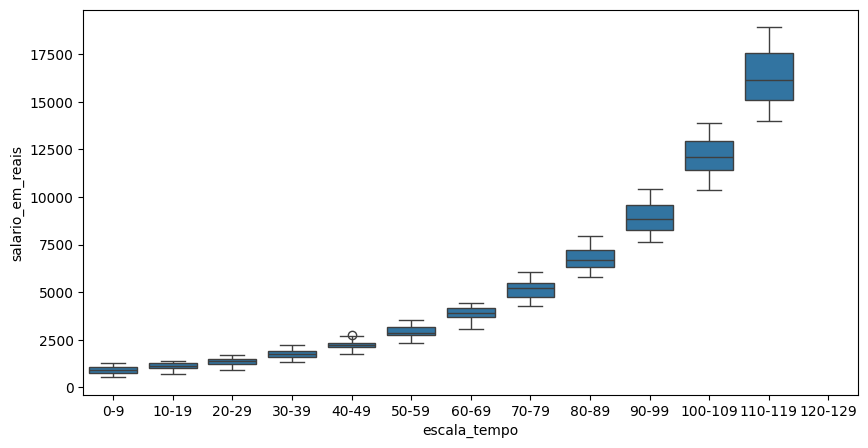

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(df_salario_bucketing, x='escala_tempo', y='salario_em_reais') 

## Treinar o Modelo Linear


In [21]:
# importar Bibliotecas Para o treinamento
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

In [22]:
# Criar a Dataset Para treino e Teste

x = df_salario.drop(columns='salario_em_reais', axis=1)
y = df_salario['salario_em_reais']

In [23]:
# Split usando kFold com 5 pastas/splits
kf= KFold(n_splits=5, shuffle=True, random_state=51)

In [24]:
# pipeline

colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

transformar_numericas = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessador = ColumnTransformer(
    transformers=[
        ('num', transformar_numericas, colunas_numericas)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

# Pipelie principal
modelo_regrecao = Pipeline(steps=[
    ('preprocessor', preprocessador),
    ('regressor', LinearRegression())
    ],
    memory=None,
    verbose=False
)


In [25]:


# Armazenar metricas (RMSE, R2Score e Residuos)
rmse_scores_fold_train = []
rmse_scores_fold_test = []
r2score_fold_test = []
residuos = []
y_pred_total = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo no conjuto de treinameto
    modelo_regrecao.fit(x_train, y_train)

    # Fazer predicoes nos conjuntos de treinamento e teste
    y_train_pred = modelo_regrecao.predict(x_train)
    y_test_pred = modelo_regrecao.predict(x_test)

    # Calcular o RMSE (para os conjuntos de trenameto e teste), R2Score e Residuos (Para cojunto de teste)

    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    r2Score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)
 
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2Score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)  



# Validacao do Modelo -Regrecao_Linear

In [26]:
rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
percetual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final)
r2Score_test_final = np.mean(r2score_fold_test)  
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1) 

### Analisi de Méntricas

In [27]:
print(f"RMSE Médio Treino: {rmse_train_final:.4f}")
print(f"RMSE Médio Teste: {rmse_test_final:.4f}")
print(f"Diferença Percentual: {percetual_rmse_final:.2%}")
print(f"R² Médio: {r2Score_test_final:.4f}")

RMSE Médio Treino: 1882.8318
RMSE Médio Teste: 1886.4504
Diferença Percentual: 0.19%
R² Médio: 0.8261


### Análise de Resíduos -Modelo Linear

In [28]:
# transformar resíduos na escala padrão: (X -media) / desvio_padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

In [29]:
residuos_std

array([ 5.95616525e-01, -7.24916727e-01, -6.46846433e-01,  8.64095533e-01,
       -5.33806156e-02, -7.61704833e-01,  6.80947606e-01,  1.45661295e+00,
        3.15407488e-01, -5.85616590e-01,  1.29483240e-01,  8.62850152e-01,
       -8.81408422e-01, -2.57676835e-01, -3.98447700e-01,  4.84215194e-01,
       -9.30147928e-01, -1.98427398e-01,  2.09007896e-01, -9.04965560e-01,
       -6.81287606e-02, -8.34446292e-01, -3.95656924e-01,  1.85180868e-01,
       -8.59767063e-01, -1.16014546e+00, -9.89137623e-01,  1.98282340e+00,
       -7.09136535e-01, -5.86755306e-01,  2.97904569e+00,  3.41834809e-01,
       -1.07716414e+00,  1.30248304e+00, -5.99662310e-01, -4.35883427e-01,
       -5.78726106e-01, -1.02611646e+00,  3.62850210e-01,  1.01353539e+00,
       -3.51902591e-01,  9.50243614e-01,  1.10020428e+00,  3.93453210e-01,
       -8.28856918e-02, -2.86114598e-01, -1.14814701e+00, -7.64435745e-01,
       -2.96268121e-01, -9.37004031e-01, -5.80106334e-01,  4.60575328e-02,
       -2.64983022e-01,  

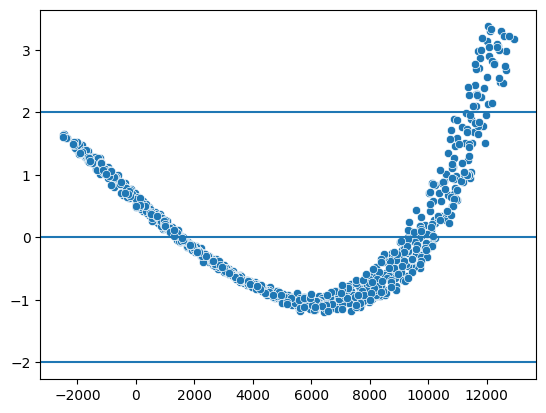

In [30]:
# Verificar linearidade dos reziduos: valores entre -2 e +2 (Escapa Padão)
# Verificar homogenicidade: valores em torno da recta sem nenhuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

<function matplotlib.pyplot.show(close=None, block=None)>

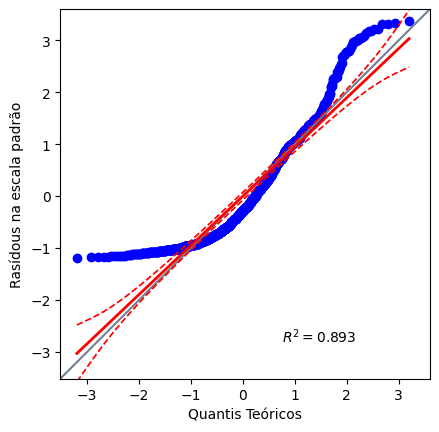

In [31]:
# Verificar se residuos seguem uma distribuicao normal
import pingouin as pg
plt.Figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Rasídous na escala padrão')
plt.show

### Teste de Normalidade

In [32]:
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

In [33]:
# Test de normalidade de Shapire-Wilk
estatistica_do_teste_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estatistica do Teste: {estatistica_do_teste_shapiro} e P_valor: {p_value_shapiro}")

Estatistica do Teste: 0.891969217965228 e P_valor: 7.013497918013492e-26


In [34]:
# Teste de normalidade de Kolmogorov-Smirnov
estatistica_do_teste_kolmogorov_smirnov, p_value_kolmogorov_smirnov = kstest(residuos, 'norm')
print(f"Estatística do teste: {estatistica_do_teste_kolmogorov_smirnov} e P_Valor: {estatistica_do_teste_kolmogorov_smirnov}")


Estatística do teste: 0.5939999999999955 e P_Valor: 0.5939999999999955


In [35]:
# Teste de noemalidade de Lilliefors
estatistica_do_teste_lilliefors, p_value_lilliefors = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estatística do teste: {estatistica_do_teste_lilliefors} e P_Valor: {p_value_lilliefors}")

Estatística do teste: 0.11825983774680088 e P_Valor: 0.0009999999999998899


# Treinamento do Modelo Polinomial

In [36]:
# Exemplo de criação de Features Polinomiais
feature_poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = feature_poly.fit_transform(x)
feature_poly.feature_names_in_

array(['tempo_na_empresa', 'nivel_na_empresa'], dtype=object)

In [37]:
feature_poly.get_feature_names_out(feature_poly.feature_names_in_)

array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [38]:
# novas variaveis

#graus_do_polinomio = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

graus_do_polinomio = [4]
rmse_train_values_por_grau = []
rmse_test_values_por_grau = []
percetual_rmse_values_por_grau = []
r2Score_test_values_por_grau = []

# Split
kf = KFold(n_splits=5, shuffle=True, random_state=51)


for grau in graus_do_polinomio:
     
    # pipeline
    colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

    transformar_numericas = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    preprocessador = ColumnTransformer(
        transformers=[
            ('num', transformar_numericas, colunas_numericas)
        ],
        remainder='drop',
        verbose_feature_names_out=False
    )

    # Criar features polinomiais
    poly_feature = PolynomialFeatures(degree=grau, include_bias=False)

    # Pipelie principal
    modelo_regrecao_polinomial = Pipeline(steps=[
        ('preprocessor', preprocessador),
        ('poly_features', poly_feature),
        ('regressor', LinearRegression())
        ],
        memory=None,
        verbose=False
    )


    # Armazenar metricas (RMSE, R2Score e Residuos)
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []
    r2score_fold_test = []
    residuos = []
    y_pred_total = []

    for train_index, test_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Treinar o modelo no conjuto de treinameto
        modelo_regrecao_polinomial.fit(x_train, y_train)

        # Fazer predicoes nos conjuntos de treinamento e teste
        y_train_pred = modelo_regrecao_polinomial.predict(x_train)
        y_test_pred = modelo_regrecao_polinomial.predict(x_test)

        # Calcular o RMSE (para os conjuntos de trenameto e teste), R2Score e Residuos (Para cojunto de teste)

        rmse_train = root_mean_squared_error(y_train, y_train_pred)
        rmse_test = root_mean_squared_error(y_test, y_test_pred)
        r2Score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2Score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)  
        
    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    percetual_rmse_final = (((rmse_test_final - rmse_train_final) / rmse_train_final)) * 100
    r2Score_test_final = np.mean(r2score_fold_test)  
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1) 

    rmse_train_values_por_grau.append(rmse_train_final)
    rmse_test_values_por_grau.append(rmse_test_final)
    r2Score_test_values_por_grau.append(r2Score_test_final)
    percetual_rmse_values_por_grau.append(percetual_rmse_final)

In [39]:
print(f"RMSE Médio Treino Por Grau: {[f'{x:.4f}' for x in rmse_train_values_por_grau]}")
print(f"RMSE Médio Teste Por Grau: {[f'{x:.4f}' for x in rmse_test_values_por_grau]}")
print(f"Diferença Percentual Por Grau: {[f'{x:.2f}' for x in percetual_rmse_values_por_grau]}")
print(f"R² Médio Por Grau: {[f'{x:.4f}' for x in r2Score_test_values_por_grau]}")

RMSE Médio Treino Por Grau: ['53.3270']
RMSE Médio Teste Por Grau: ['54.7050']
Diferença Percentual Por Grau: ['2.58']
R² Médio Por Grau: ['0.9999']


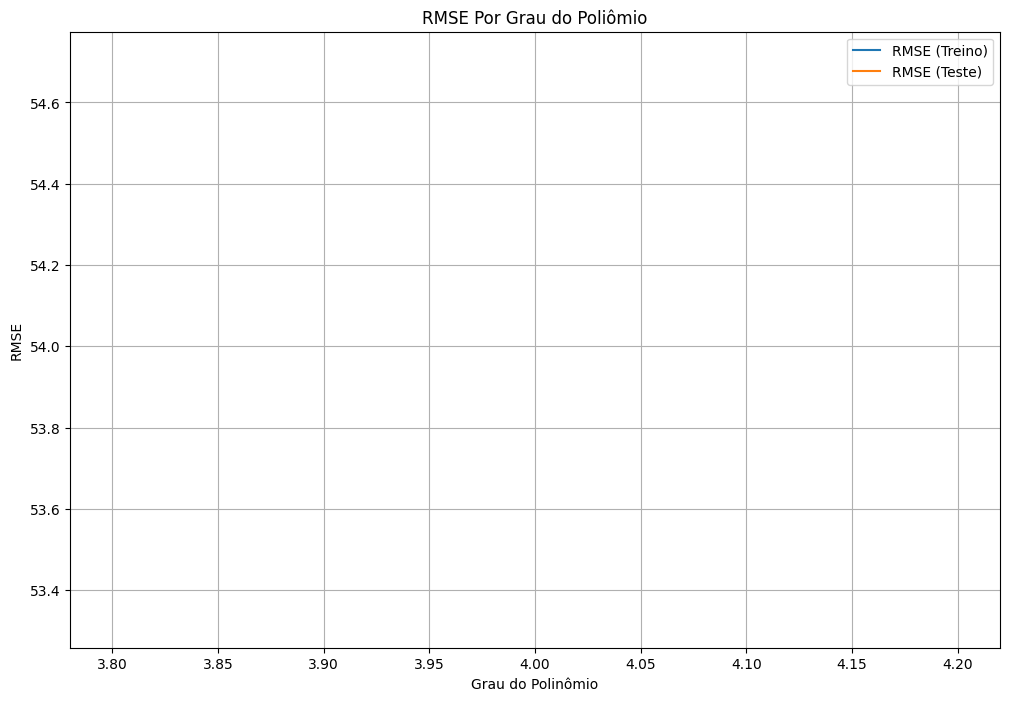

In [40]:
# Plotar grafico para comparar RMSE por grau de polinomio graficamente
plt.figure(figsize=(12,8))
plt.plot(graus_do_polinomio, rmse_train_values_por_grau, label='RMSE (Treino)')
plt.plot(graus_do_polinomio, rmse_test_values_por_grau, label='RMSE (Teste)')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE Por Grau do Poliômio')
plt.legend()
plt.grid(True)
plt.show()

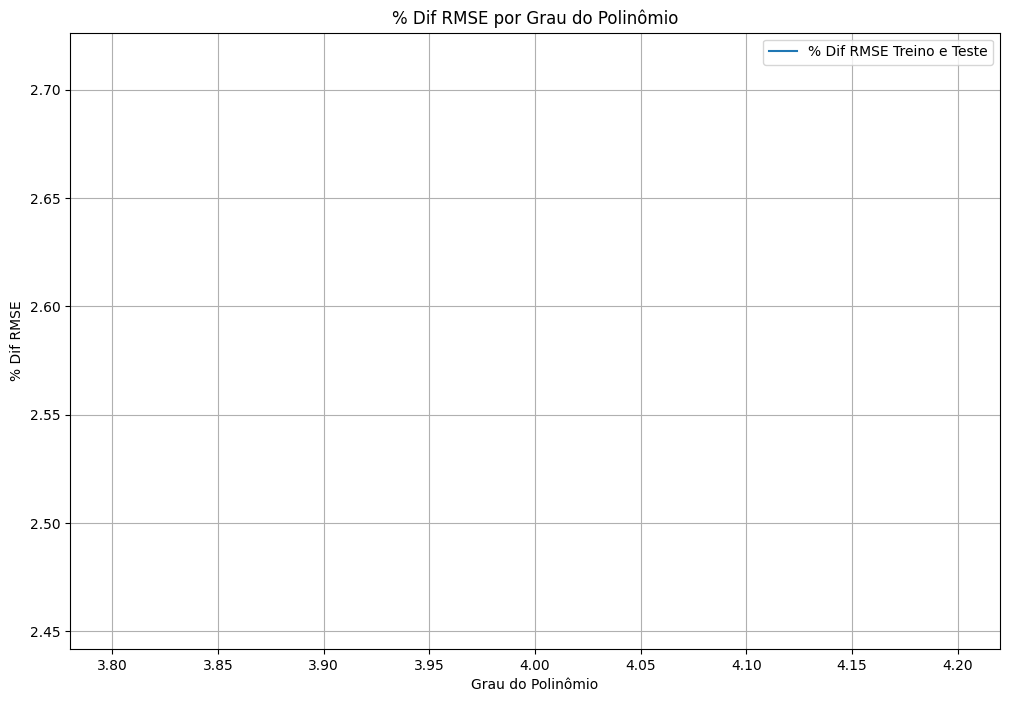

In [41]:
# Plotar grafico para comparar %Dif RMSE (Treino e Teste)
plt.figure(figsize=(12,8))
plt.plot(graus_do_polinomio, percetual_rmse_values_por_grau, label='% Dif RMSE Treino e Teste')
plt.xlabel('Grau do Polinômio')
plt.ylabel('% Dif RMSE')
plt.title('% Dif RMSE por Grau do Polinômio')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
print(f"RMSE Médio Treino: {rmse_train_final:.4f}")
print(f"RMSE Médio Teste: {rmse_test_final:.4f}")
print(f"Diferença Percentual: {percetual_rmse_final}")
print(f"R² Médio: {r2Score_test_final:.4f}")

RMSE Médio Treino: 53.3270
RMSE Médio Teste: 54.7050
Diferença Percentual: 2.5841661907546576
R² Médio: 0.9999


### Analisi de residuos do Modelo Polinomial


In [43]:
# transformar resíduos na escala padrão: (X -media) / desvio_padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

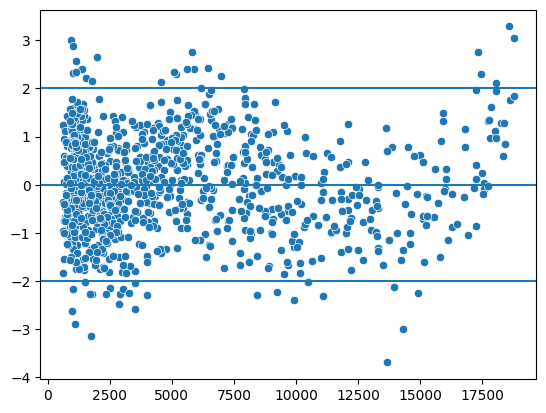

In [44]:
# Verificar linearidade dos reziduos: valores entre -2 e +2 (Escapa Padão)
# Verificar homogenicidade: valores em torno da recta sem nenhuma tendencia ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

<function matplotlib.pyplot.show(close=None, block=None)>

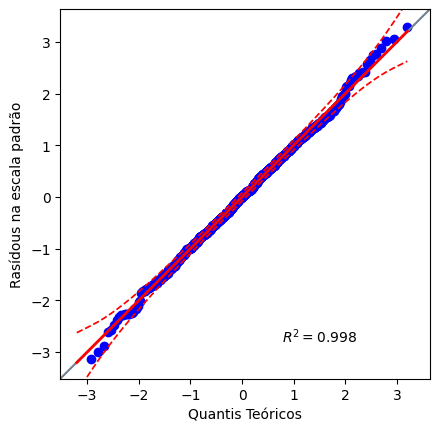

In [45]:
# Verificar se residuos seguem uma distribuicao normal
import pingouin as pg
plt.Figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Rasídous na escala padrão')
plt.show

### Teste de Normalidade

In [46]:
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

In [47]:
# Test de normalidade de Shapire-Wilk
estatistica_do_teste_shapiro, p_value_shapiro = shapiro(residuos)
print(f"Estatistica do Teste: {estatistica_do_teste_shapiro} e P_valor: {p_value_shapiro}")

Estatistica do Teste: 0.9986951372205322 e P_valor: 0.6852797159659514


In [48]:
# Teste de normalidade de Kolmogorov-Smirnov
estatistica_do_teste_kolmogorov_smirnov, p_value_kolmogorov_smirnov = kstest(residuos, 'norm')
print(f"Estatística do teste: {estatistica_do_teste_kolmogorov_smirnov} e P_Valor: {estatistica_do_teste_kolmogorov_smirnov}")


Estatística do teste: 0.48237446499530856 e P_Valor: 0.48237446499530856


In [49]:
# Teste de noemalidade de Lilliefors
estatistica_do_teste_lilliefors, p_value_lilliefors = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f"Estatística do teste: {estatistica_do_teste_lilliefors} e P_Valor: {p_value_lilliefors}")

Estatística do teste: 0.013637346894986191 e P_Valor: 0.9566270022044506


# Finalizar Modelo

### Fazer Predição Individual

In [50]:
input_features = {
    'tempo_na_empresa': 72,
    'nivel_na_empresa': 10
}

pred_df = pd.DataFrame(input_features, index=[1])

In [51]:
# Predição
modelo_regrecao_polinomial.predict(pred_df)

array([4808.03154228])

#### Salvar o Modelo

In [52]:
import joblib

In [53]:
joblib.dump(modelo_regrecao_polinomial, './modelo_salario.pkl')

['./modelo_salario.pkl']